In [1]:
import pandas as pd
import pandas_ta as ta
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats
import datetime
import MetaTrader5 as mt5

In [2]:
if not mt5.initialize(
    login=114999529, server="Exness-MT5Trial6", password="Mypassword$1234"
):
    print("initialize() failed, error code =", mt5.last_error())
    quit()

login = 114999529
password = "Mypassword$1234"
server = "Exness-MT5Trial6"
mt5.login(login, password, server)
rate = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_M15, datetime.datetime.now(), 500)
df = pd.DataFrame(rate)

df['date']=pd.to_datetime(df['time'], unit='s')

df.set_index(np.arange(len(df)), inplace = True)
df = df.drop(['spread', 'real_volume', 'tick_volume', 'time'], axis='columns')

# df['RSI'] = ta.rsi(df.close, length=12)
# df['EMA'] = ta.ema(df.close, length=150)


# df=df[-5000:]

df.set_index(np.arange(len(df)), inplace = True)

df['atr'] = ta.atr(high=df.high, low=df.low, close=df.close)

df['atr'] = df.atr.rolling(window=30).mean()



In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)

In [4]:
# fig, ax = plt.subplots()
# plt.xticks(rotation=30)
# price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)

# plt.show()

In [5]:
# df['close_smooth'] = savgol_filter(df.close, 30, 10)
# fig, ax = plt.subplots()
# plt.xticks(rotation=-30)
# price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
# price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

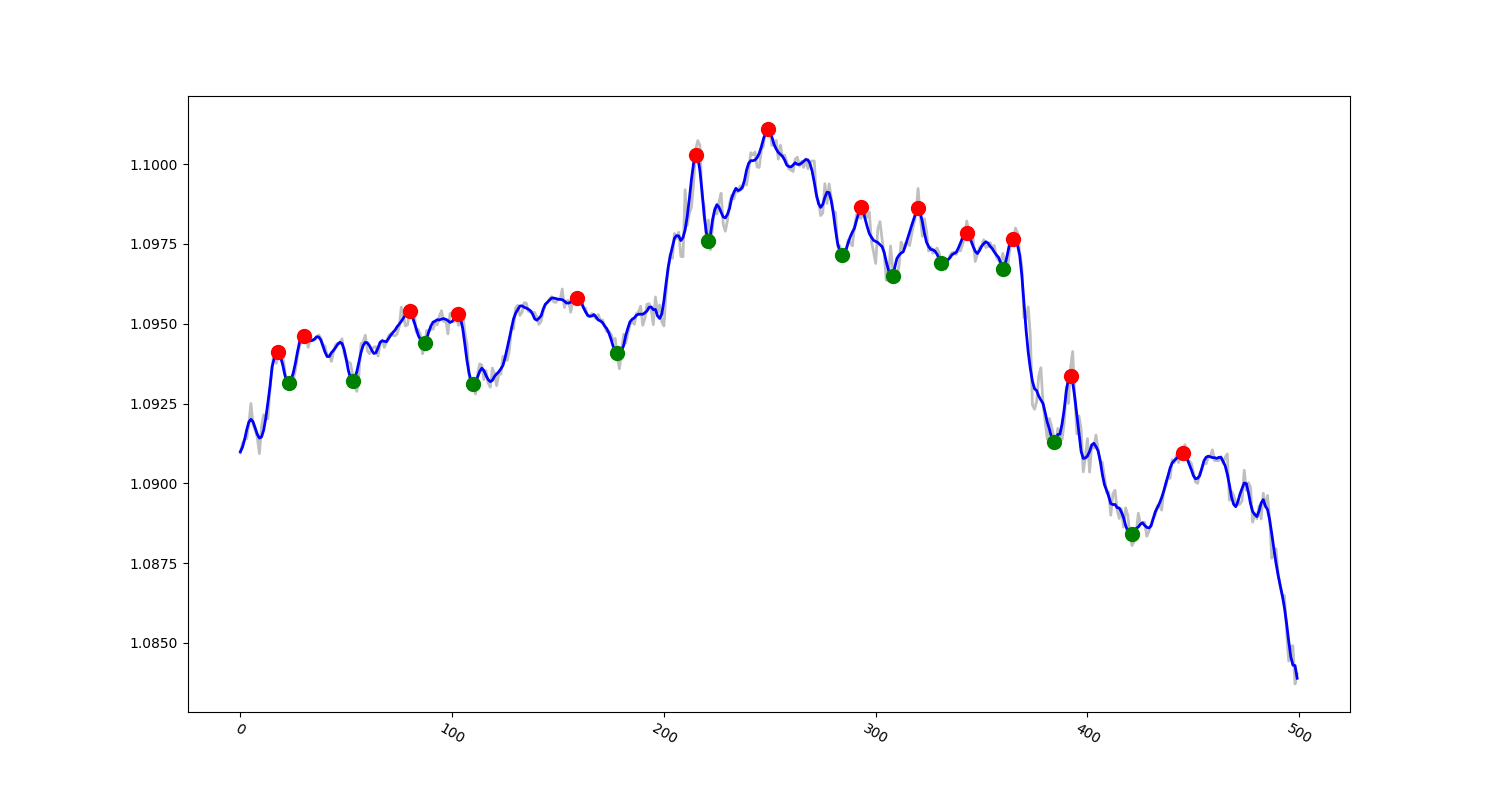

In [6]:
# wORKS GOOD ON: distance = 25, width = 10, savgol_filter(df.close, 30, 10)

# df = df[-600:]
df['close_smooth'] = savgol_filter(df.close, 30, 10)
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=-30)
price, = ax.plot(df.index, df.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df.index, df.close_smooth, c='b', lw=2, zorder=5)

atr = df.atr.iloc[-1]

peaks_idx,_ = find_peaks(df.close_smooth, distance = 10, width = 5, prominence= atr)

# print(df.close_smooth.iloc[peaks_idx[0]])

# print(peaks_idx[-1])

troughs_idx,_ = find_peaks(-1*df.close_smooth, distance = 10, width = 5, prominence= atr)

peaks, = ax.plot(df.index[peaks_idx], df.close_smooth.iloc[peaks_idx], \
                c="r", linestyle="None", markersize=10.0, marker="o", zorder=10)

troughs, = ax.plot(df.index[troughs_idx], df.close_smooth.iloc[troughs_idx], \
                c="g", linestyle="None", markersize=10.0, marker="o", zorder=10)

# plt.show()

# Save the plot as an image file
plt.savefig('my_plot.png')  # You can change the file extension as needed
plt.close()

# Display the saved image in the notebook
from IPython.display import Image
Image(filename='my_plot.png')  # Use the same filename you specified above